[National Geospatial-Intelligence Agency (NGA) Maritime Safety Information](https://msi.nga.mil/)

[World Port Index (Pub 150)](https://msi.nga.mil/Publications/WPI)

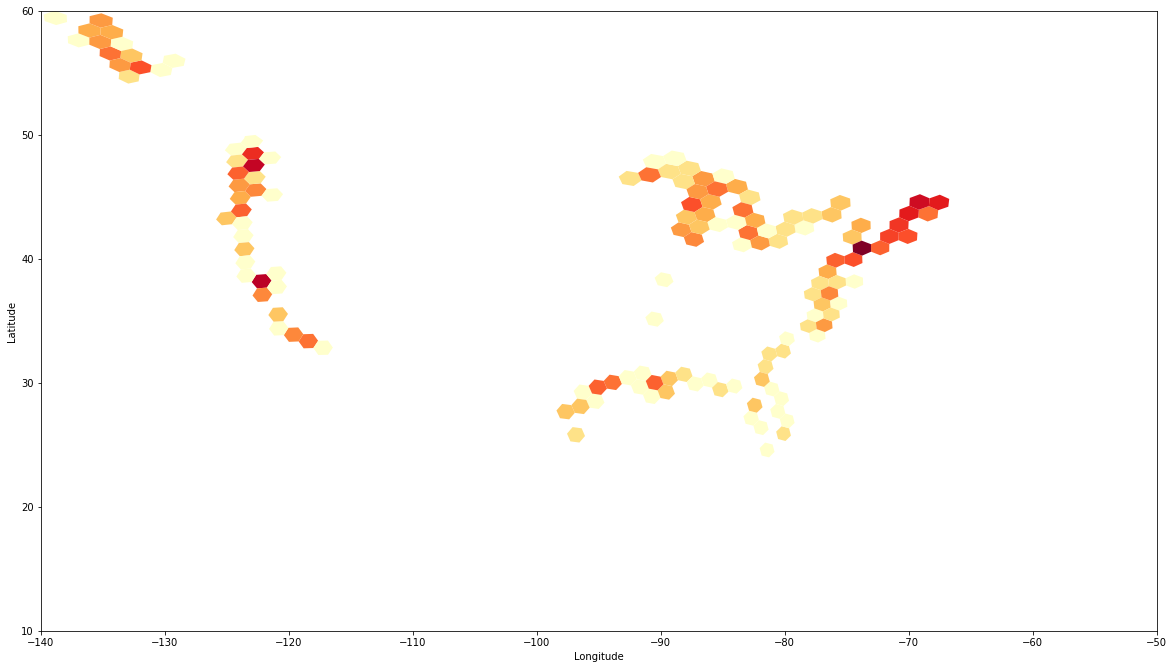

In [0]:
# Import required libraries
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 3

# Read the spark dataframe
df_ports = spark.read.table("ais.UpdatedPub150_US")

# Add a 'resolution' column
df_ports = df_ports.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location
df_ports = df_ports.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ports['Latitude'], df_ports['Longitude'], df_ports['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ports.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id, and filter them based on the bounding box
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    # create a point based on the polygon's centroid and check if it lies within the bounding box
    centroid = polygon.centroid
    if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
        hex_polygons.append(polygon)
        hex_ids.append(hex_id)

# Filter the density dataframe to only include hexagons within the bounding box
df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map with the YlOrRd colormap
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


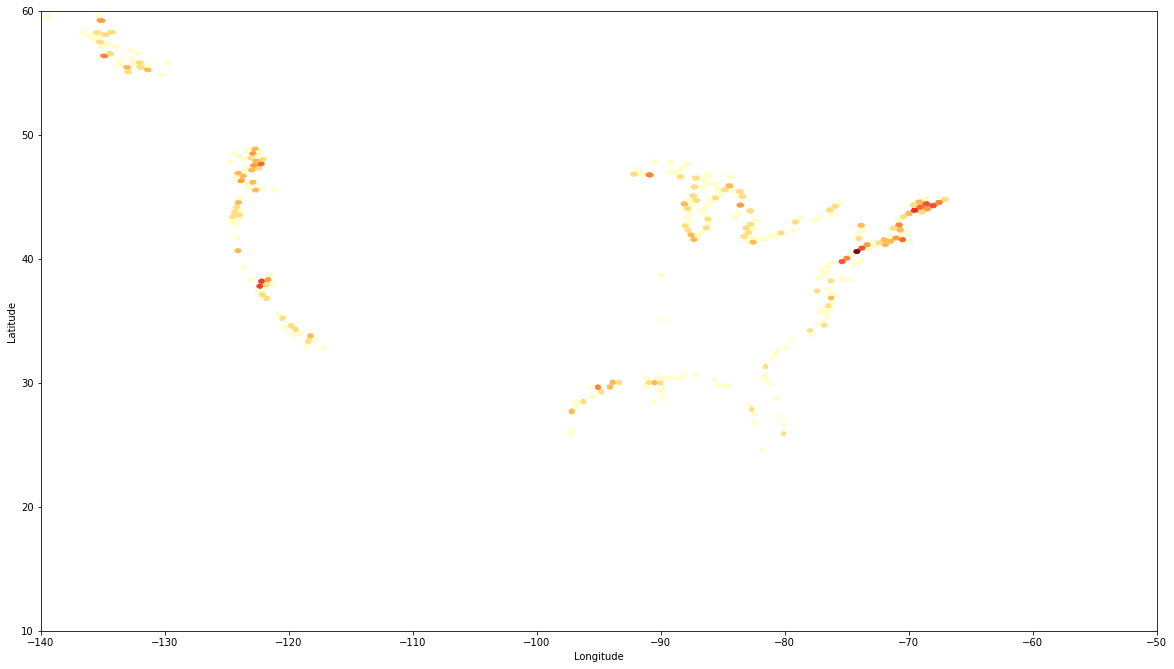

In [0]:
# Import required libraries
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
import matplotlib.colors as colors

# Define the lat/lon boundaries
min_lat, max_lat, min_lon, max_lon = 10, 60, -140, -50

# Define the hexagon resolution
resolution = 4

# Read the spark dataframe
df_ports = spark.read.table("ais.UpdatedPub150_US")

# Add a 'resolution' column
df_ports = df_ports.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location
df_ports = df_ports.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ports['Latitude'], df_ports['Longitude'], df_ports['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ports.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id, and filter them based on the bounding box
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    # create a point based on the polygon's centroid and check if it lies within the bounding box
    centroid = polygon.centroid
    if min_lat <= centroid.y <= max_lat and min_lon <= centroid.x <= max_lon:
        hex_polygons.append(polygon)
        hex_ids.append(hex_id)

# Filter the density dataframe to only include hexagons within the bounding box
df_density_pd = df_density_pd[df_density_pd['hex_id'].isin(hex_ids)]

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map with the YlOrRd colormap
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


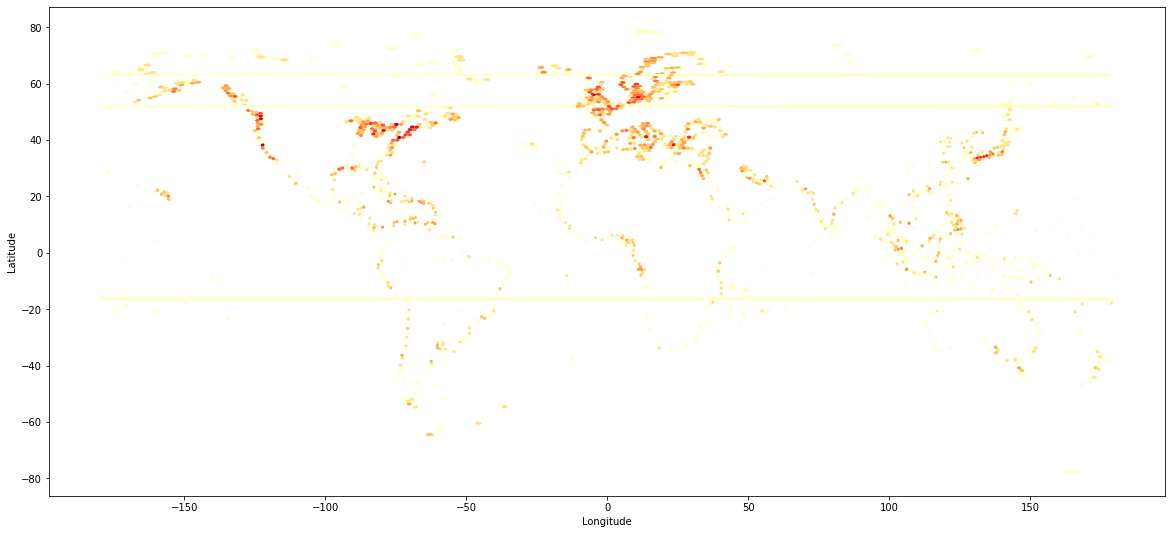

In [0]:
# Import required libraries
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
import matplotlib.colors as colors

# Define the hexagon resolution
resolution = 3

# Read the spark dataframe
df_ports = spark.read.table("ais.UpdatedPub150")

# Add a 'resolution' column
df_ports = df_ports.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location
df_ports = df_ports.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ports['Latitude'], df_ports['Longitude'], df_ports['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ports.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    hex_polygons.append(polygon)
    hex_ids.append(hex_id)

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map with the YlOrRd colormap
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


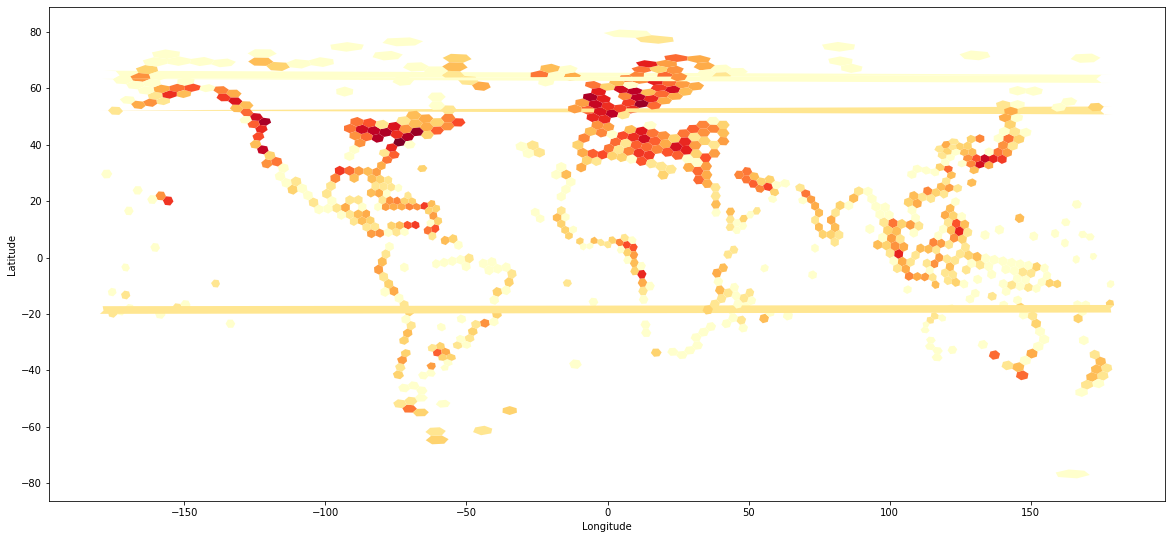

In [0]:
# Import required libraries
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import h3
import h3_pyspark
from pyspark.sql import functions as F
import matplotlib.colors as colors

# Define the hexagon resolution
resolution = 2

# Read the spark dataframe
df_ports = spark.read.table("ais.UpdatedPub150")

# Add a 'resolution' column
df_ports = df_ports.withColumn('resolution', F.lit(resolution))

# Create an h3 index for each location
df_ports = df_ports.withColumn('hex_id', h3_pyspark.geo_to_h3(df_ports['Latitude'], df_ports['Longitude'], df_ports['resolution']))

# Count the occurrences of each hex_id to get the density
df_density = df_ports.groupBy('hex_id').count()

# Convert the density dataframe to Pandas
df_density_pd = df_density.toPandas()

# Create polygons for each unique hex_id
hex_polygons = []
hex_ids = []
for hex_id in df_density_pd['hex_id'].unique():
    hex_boundary = h3.h3_to_geo_boundary(hex_id)
    polygon = Polygon([(lon, lat) for lat, lon in hex_boundary])
    hex_polygons.append(polygon)
    hex_ids.append(hex_id)

# Replace inf with max non-inf value and NaN with 1
df_density_pd.loc[df_density_pd['count'] == np.inf, 'count'] = df_density_pd.loc[df_density_pd['count'] != np.inf, 'count'].max()
df_density_pd['count'] = df_density_pd['count'].replace({0:1}).fillna(1)

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(df_density_pd, geometry=hex_polygons)

# Plot the choropleth map with the YlOrRd colormap
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
gdf.plot(column='count', cmap='YlOrRd', norm=colors.LogNorm(vmin=gdf['count'].min(), vmax=gdf['count'].max()), missing_kwds={'color': 'white'}, ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()
